# Lab 9: Eigenvalue Problem Demo

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import scipy.sparse.linalg

In [11]:
OMEGA = 1
BOXSIZE = 8
ND = 60 #600
DELTAX = BOXSIZE / ND
HBAR = 1 
ALPHA = 0.4

x = np.linspace(-BOXSIZE / 2, BOXSIZE / 2, ND + 1)

def V(x):
    return 0.5*x**2

H = np.zeros((ND + 1, ND + 1))

for i in range(ND + 1):
    for j in range(ND + 1):
        # kinetic part
        H[i, j] = -(0.5 / DELTAX**2) * ((i + 1 == j) - 2 * (i == j) + (i - 1 == j)) 
        # potential part
        H[i, j] += V(x[i]) * (i == j)

# print the first 4x4 elements of H
print(H[:4,:4])

[[ 64.25       -28.125        0.           0.        ]
 [-28.125       63.72555556 -28.125        0.        ]
 [  0.         -28.125       63.21888889 -28.125     ]
 [  0.           0.         -28.125       62.73      ]]


In [12]:
%%timeit
# standard method
Es, psi = scipy.linalg.eigh(H)
#print(Es)

11 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit
# find the lowest eigenvalues and corresponding eigenvectors of H using ARPACK
Es, psis = scipy.sparse.linalg.eigsh(H, k=2, which='SM')
#print(Es)

7.56 ms ± 57.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
# shift-invert mode is faster for finding these
Es, psis = scipy.sparse.linalg.eigsh(H, k=2, sigma=0, which='LM')
#print(Es)

51.4 ms ± 12.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
Es, psis = scipy.sparse.linalg.eigsh(H, k=2, sigma=0, which='LM')

E_0 = Es[0]
E_1 = Es[1]
psi_0 = psis[:, 0]
psi_1 = psis[:, 1]

# normalize the wave functions
psi_0 /= np.sqrt(np.sum(psi_0.conjugate() * psi_0) * DELTAX)
psi_1 /= np.sqrt(np.sum(psi_1.conjugate() * psi_1) * DELTAX)

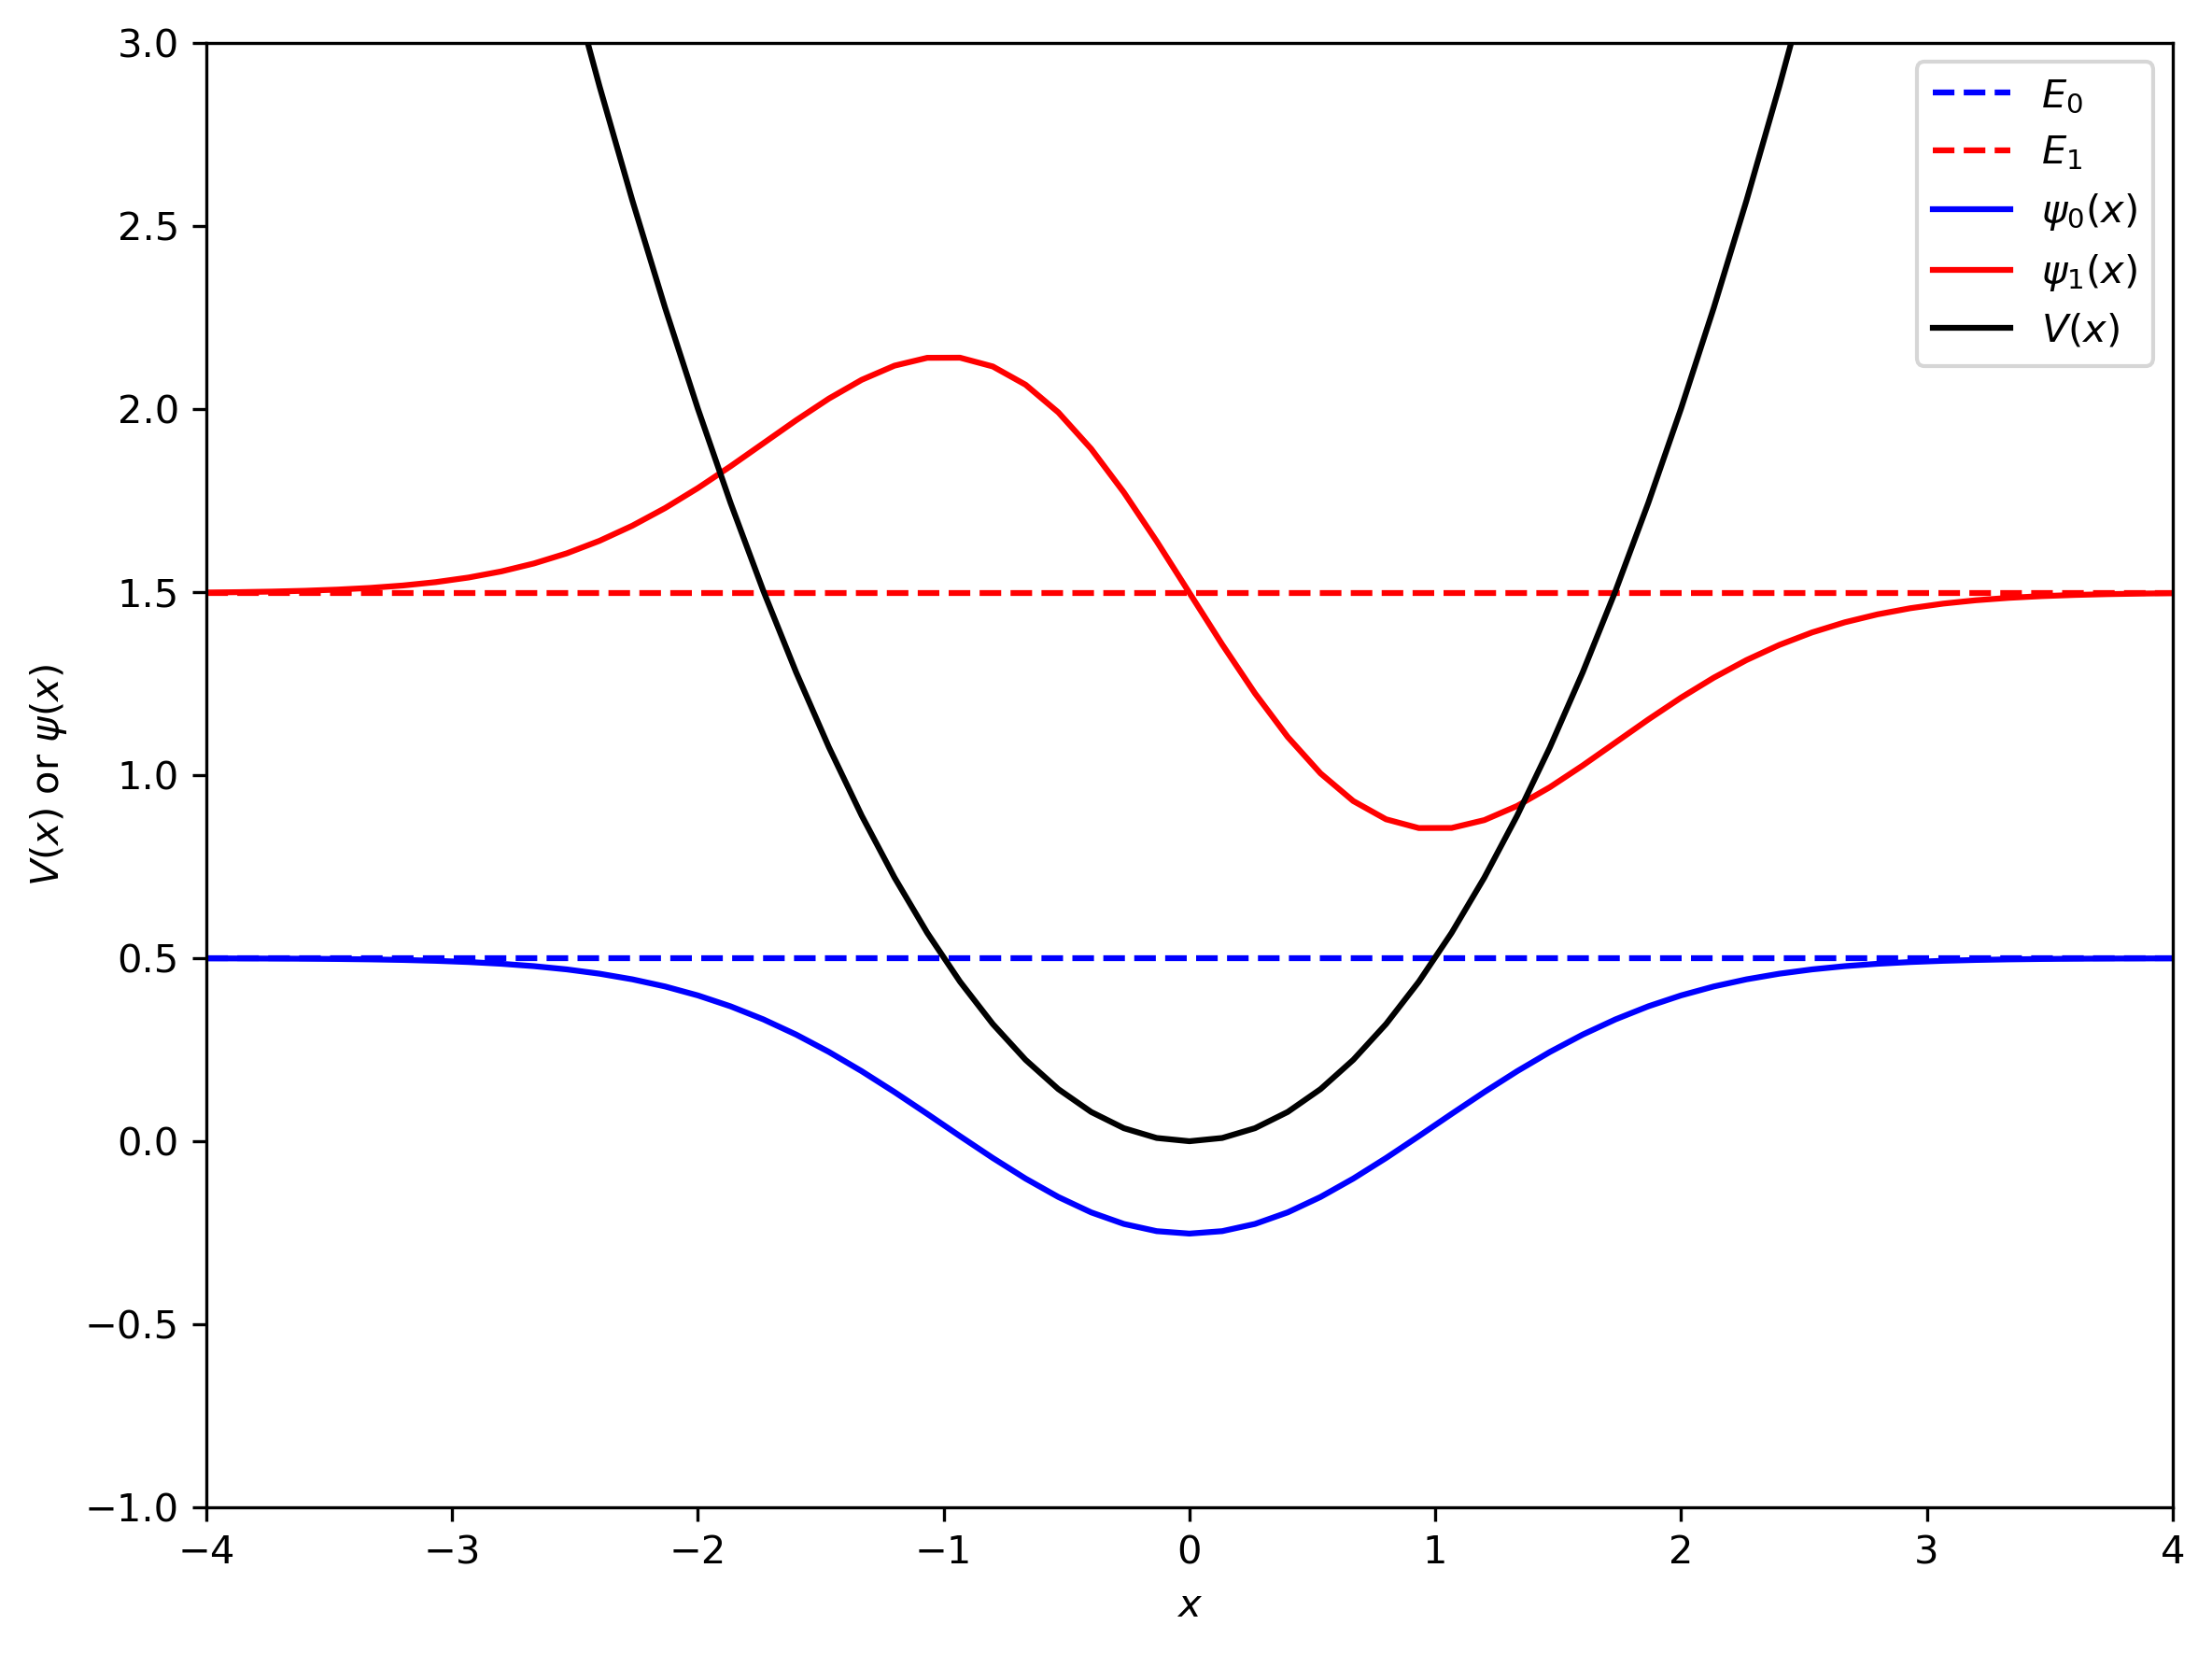

In [16]:
xmin, xmax, ymin, ymax = -BOXSIZE/2, BOXSIZE/2, -1, 3
plt.figure(dpi=300, figsize=(8, 6))
plt.plot(x, E_0*np.ones_like(x), 'b--', label=f"$E_0$")
plt.plot(x, E_1*np.ones_like(x), 'r--', label=f"$E_1$")
plt.plot(x, psi_0 + E_0, 'b-', label=f"$\psi_0(x)$")
plt.plot(x, psi_1 + E_1, 'r-', label=f"$\psi_1(x)$")
plt.plot(x, V(x), 'k', label='$V(x)$')
plt.xlabel("$x$")
plt.ylabel(r"$V(x)$ or $\psi(x)$")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("ho_e0_e1.pdf")
plt.show()

## Manual power method

Let's try the power method manually for the lowest eigenvalue of the following matrix.

Following lecture, we will need to first invert the matrix.

In [46]:
n_iter = 80
u = [np.ones(ND + 1)]
lambda_0 = [np.dot(u[-1].conjugate(), H @ u[0]) / np.dot(u[-1].conjugate(), u[0])]
Hinv = scipy.linalg.inv(H)
for i in range(n_iter):
    u.append(Hinv @ u[-1])
    u[-1] /= (np.sum(u[-1].conjugate() * u[-1]) * DELTAX)
    lambda_0.append(np.dot(u[-1].conjugate(), H @ u[-1]) / np.dot(u[-1].conjugate(), u[-1]))
 
print(lambda_0[-1])

0.4994440124683848


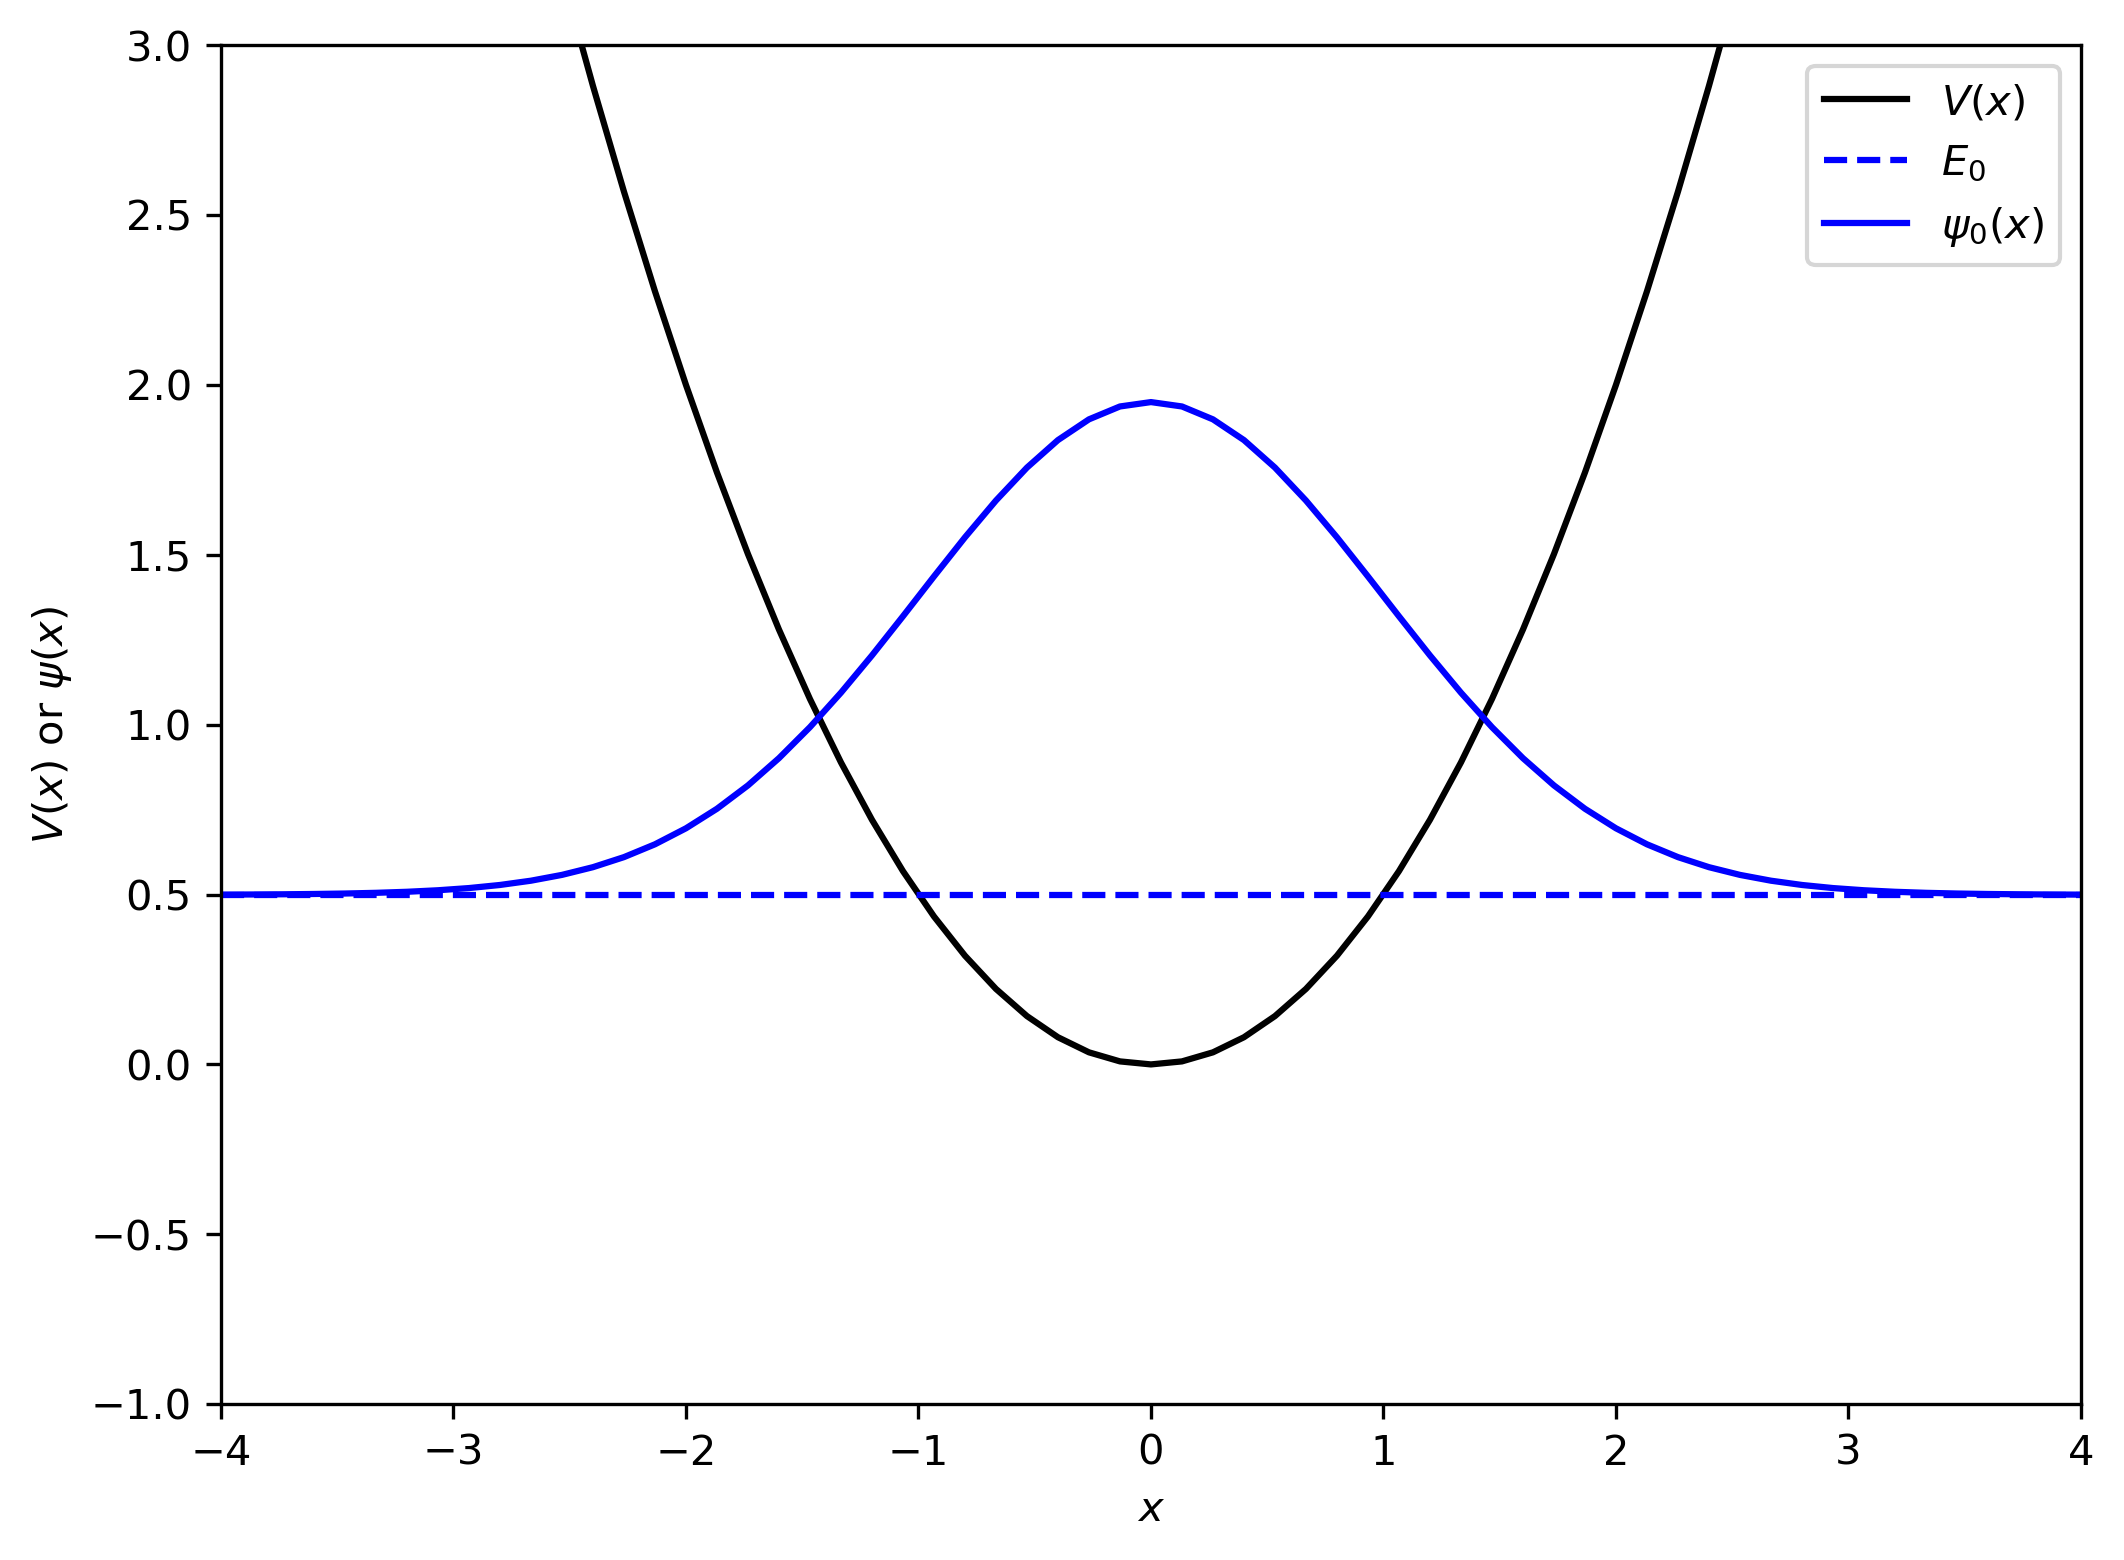

In [47]:
plt.figure(dpi=300, figsize=(8, 6))
plt.plot(x, V(x), 'k', label='$V(x)$')
plt.plot(x, lambda_0[-1]*np.ones_like(x), 'b--', label=f"$E_0$")
plt.plot(x, u[-1] + lambda_0[-1], 'b-', label=f"$\psi_0(x)$")
plt.xlabel("$x$")
plt.ylabel(r"$V(x)$ or $\psi(x)$")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend()
plt.show()

## Exercise: repeat for the second eigenvalue


In [42]:
n_iter = 80
u = [np.ones(ND + 1)]
lambda_0 = [np.dot(u[-1].conjugate(), H @ u[0]) / np.dot(u[-1].conjugate(), u[0])]
Hinv = scipy.linalg.inv((H-1.3*np.identity(ND+1)))
for i in range(n_iter):
    u.append(Hinv @ u[-1])
    u[-1] /= (np.sum(u[-1].conjugate() * u[-1]) * DELTAX)
    lambda_0.append(np.dot(u[-1].conjugate(), H @ u[-1]) / np.dot(u[-1].conjugate(), u[-1]))

print(lambda_0[-1])

1.4972224091357913


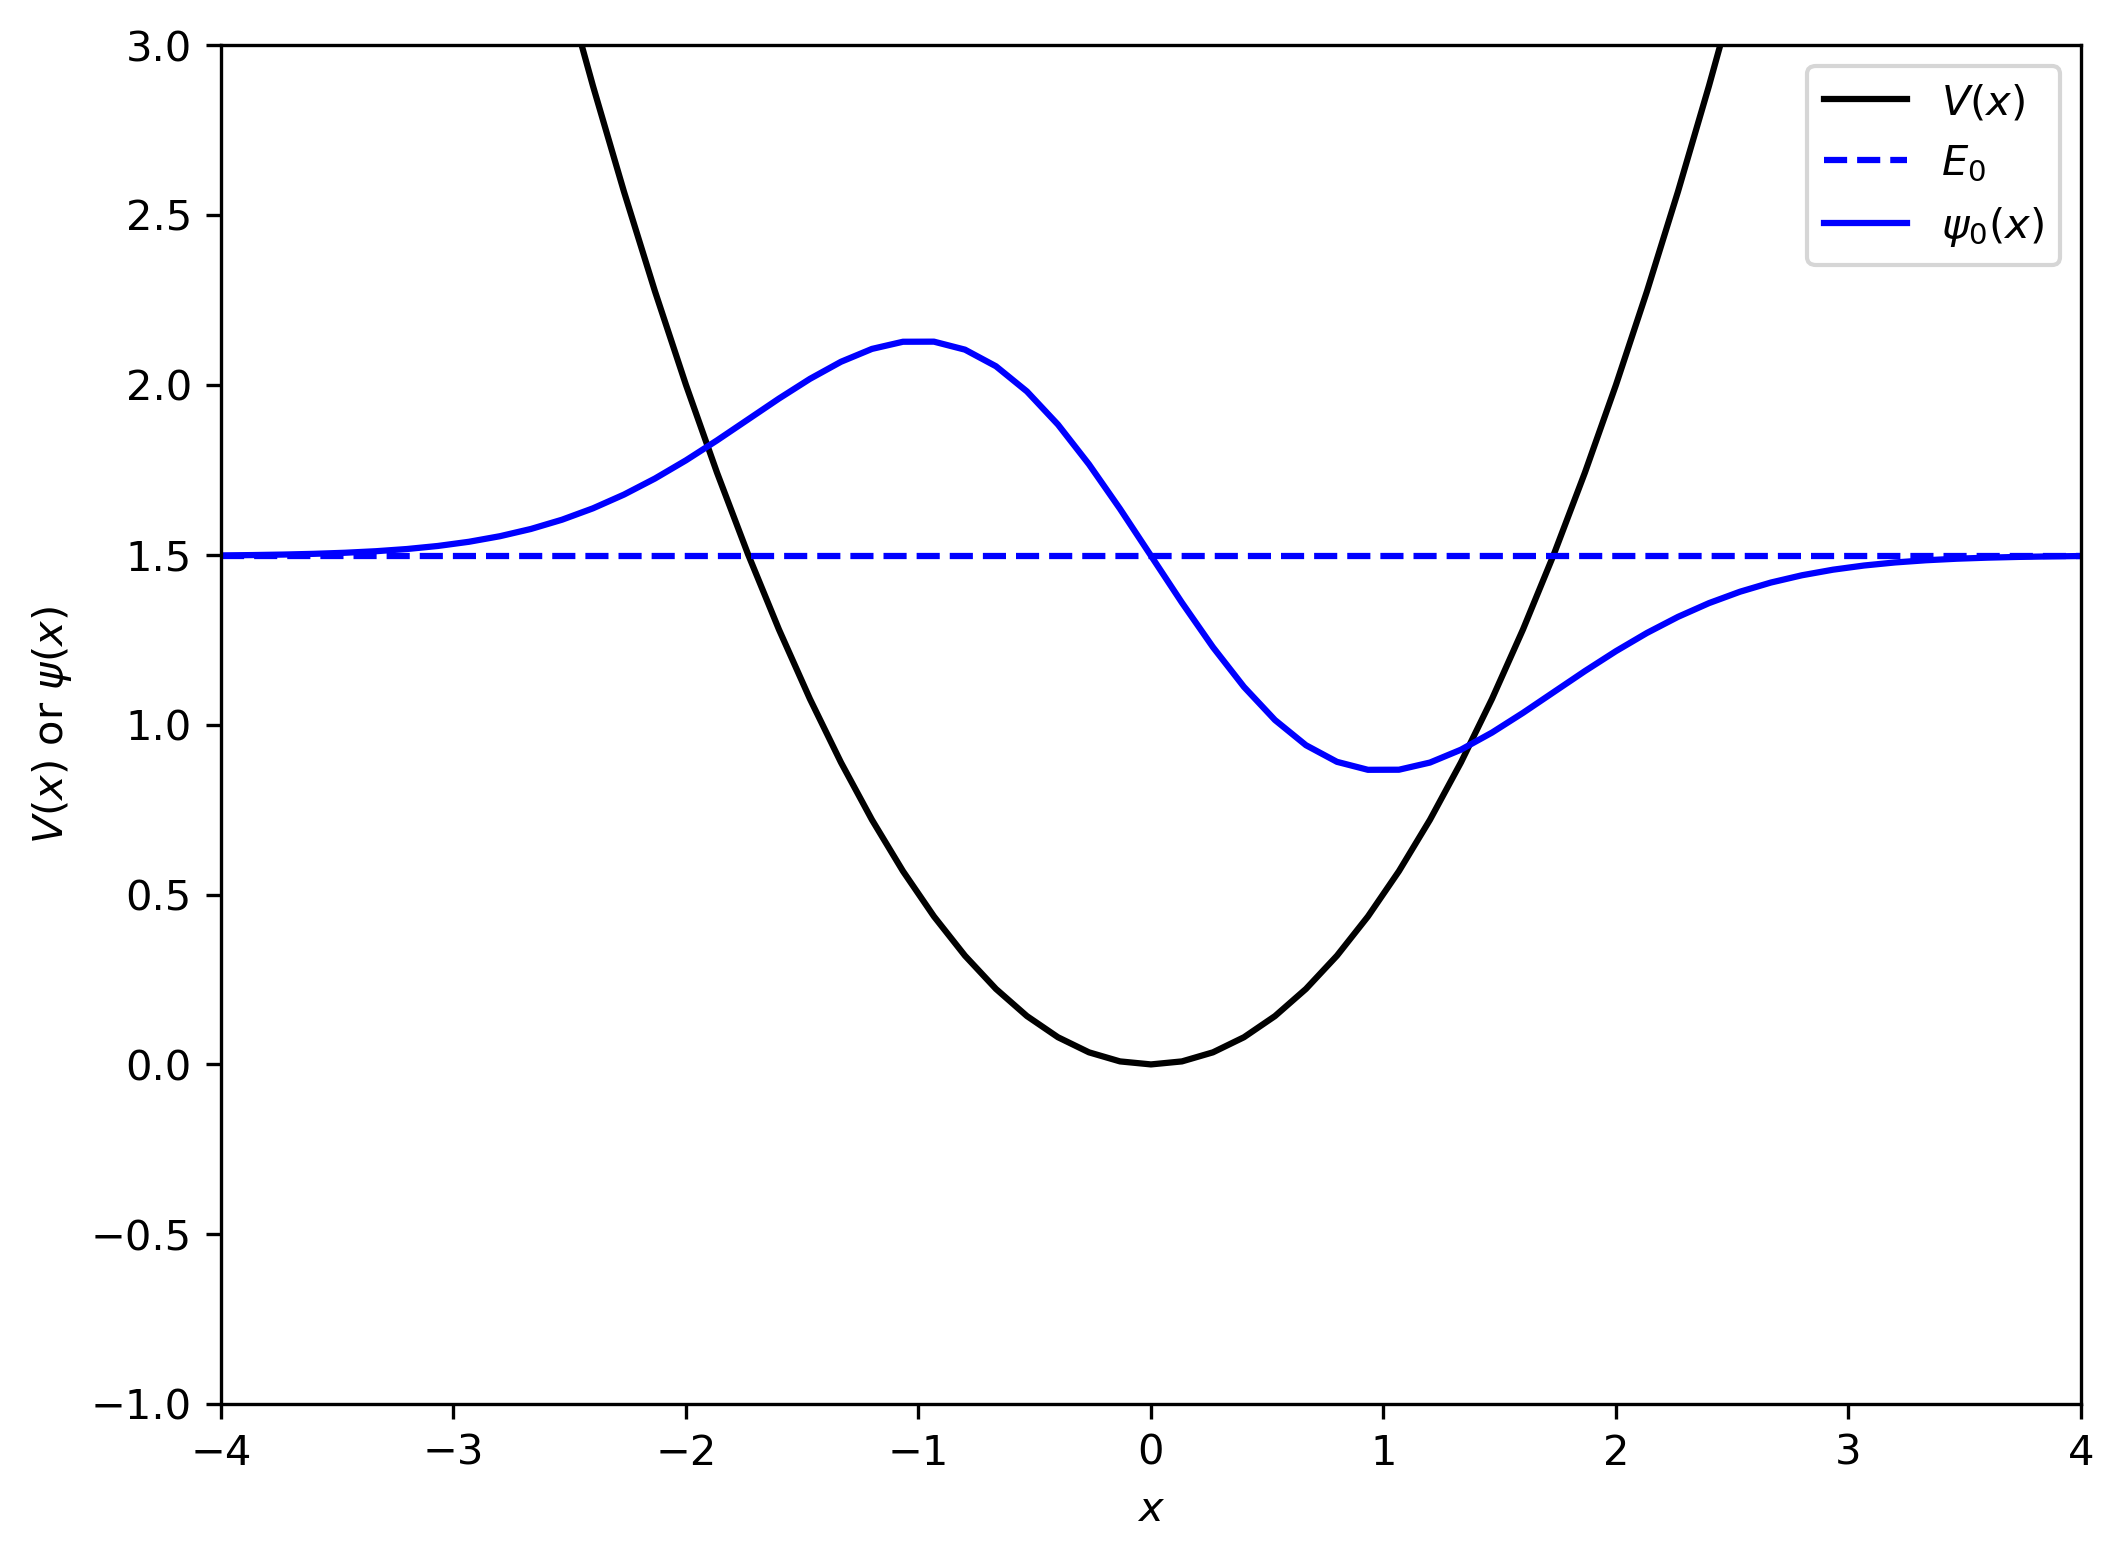

In [45]:
plt.figure(dpi=300, figsize=(8, 6))
plt.plot(x, V(x), 'k', label='$V(x)$')
plt.plot(x, lambda_0[-1]*np.ones_like(x), 'b--', label=f"$E_0$")
plt.plot(x, u[-1] + lambda_0[-1], 'b-', label=f"$\psi_0(x)$")
plt.xlabel("$x$")
plt.ylabel(r"$V(x)$ or $\psi(x)$")
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])
plt.legend()
plt.show()